In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
from sklearn import svm

In [3]:
emg_df = pd.read_excel(r"C:\Users\Thang Le\Documents\github\smart_pros\hand_jupyter_notebook\Rescaled_EMG_time.xlsx", sheet_name = "muscle_1")

In [4]:
emg_df.head() # checking the first 5

,Time stamp,Voltage (mV),Rescaled time (ms)
0,15:38:13.804 -> 3010,0.68,0
1,15:38:13.804 -> 3020,0.66,10
2,15:38:13.804 -> 3032,0.64,22
3,15:38:13.842 -> 3042,0.64,32
4,15:38:13.842 -> 3052,0.62,42


In [5]:
emg_df.columns = ['Time_stamp', 'Voltage', 'Rescaled_time']

In [6]:
emg_df.head()

,Time_stamp,Voltage,Rescaled_time
0,15:38:13.804 -> 3010,0.68,0
1,15:38:13.804 -> 3020,0.66,10
2,15:38:13.804 -> 3032,0.64,22
3,15:38:13.842 -> 3042,0.64,32
4,15:38:13.842 -> 3052,0.62,42


In [7]:
emg_df.drop('Time_stamp',1)

,Voltage,Rescaled_time
0,0.68,0
1,0.66,10
2,0.64,22
3,0.64,32
4,0.62,42
...,...,...
294,0.43,3121
295,0.42,3131
296,0.41,3143
297,0.39,3153


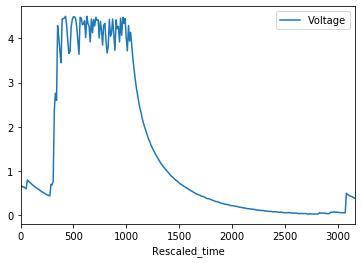

In [8]:
emg_df.plot(x = 'Rescaled_time', y = 'Voltage', kind='line')
mpl.show()

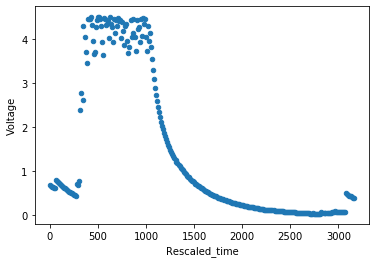

In [12]:
 emg_df.plot(x='Rescaled_time', y="Voltage", kind="scatter")